In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel(r'desktop\drought_dataset.xlsx')

In [3]:
data.head(4)

,Entity,Year,Number of deaths from drought,Number of people injured from drought,Number of people affected from drought,Number of people left homeless from drought,Number of total people affected by drought,Reconstruction costs from drought,Insured damages against drought,Total economic damages from drought,Death rates from drought,Injury rates from drought,"Number of people affected by drought per 100,000",Homelessness rate from drought,"Total number of people affected by drought per 100,000"
0,Afghanistan,1950,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,0.0,0.0,0.000000,0,0.000000
1,Afghanistan,1960,0.0,0.0,4800.0,0,4800.0,0.0,0.0,20.0,0.0,0.0,44.060951,0,44.060951
2,Afghanistan,1970,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000
3,Afghanistan,1980,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000


# model:how many people are  affected by drought 

# Check the basic details of the dataset

In [4]:
data.shape

(1464, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 15 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Entity                                                  1464 non-null   object 
 1   Year                                                    1464 non-null   int64  
 2   Number of deaths from drought                           1464 non-null   float64
 3   Number of people injured from drought                   1464 non-null   float64
 4   Number of people affected from drought                  1464 non-null   float64
 5   Number of people left homeless from drought             1464 non-null   int64  
 6   Number of total people affected by drought              1464 non-null   float64
 7   Reconstruction costs from drought                       1052 non-null   float64
 8   Insured damages against drought       

# Missing value

In [6]:
data.columns

Index(['Entity', 'Year', 'Number of deaths from drought',
       'Number of people injured from drought',
       'Number of people affected from drought',
       'Number of people left homeless from drought',
       'Number of total people affected by drought',
       'Reconstruction costs from drought', 'Insured damages against drought',
       'Total economic damages from drought', 'Death rates from drought',
       'Injury rates from drought',
       'Number of people affected by drought per 100,000',
       'Homelessness rate from drought',
       'Total number of people affected by drought per 100,000'],
      dtype='object')

In [7]:
data.isnull().sum()

Entity                                                      0
Year                                                        0
Number of deaths from drought                               0
Number of people injured from drought                       0
Number of people affected from drought                      0
Number of people left homeless from drought                 0
Number of total people affected by drought                  0
Reconstruction costs from drought                         412
Insured damages against drought                           412
Total economic damages from drought                       412
Death rates from drought                                    0
Injury rates from drought                                   0
Number of people affected by drought per 100,000            0
Homelessness rate from drought                              0
Total number of people affected by drought per 100,000      0
dtype: int64

here variable Reconstruction costs from drought,Insured damages against drought  and Total economic damages from drought are missing value

In [8]:
for i in['Reconstruction costs from drought', 'Insured damages against drought', 'Total economic damages from drought']:
    data[i]=data[i].fillna(data[i].mean())


In [9]:
data.isnull().sum()

Entity                                                    0
Year                                                      0
Number of deaths from drought                             0
Number of people injured from drought                     0
Number of people affected from drought                    0
Number of people left homeless from drought               0
Number of total people affected by drought                0
Reconstruction costs from drought                         0
Insured damages against drought                           0
Total economic damages from drought                       0
Death rates from drought                                  0
Injury rates from drought                                 0
Number of people affected by drought per 100,000          0
Homelessness rate from drought                            0
Total number of people affected by drought per 100,000    0
dtype: int64

missing value clear

In [11]:
data.Year.nunique()

12

In [12]:
data.Entity.nunique()

214

In [13]:
# #catagarical variable: entity, and year can be dropit 
#they are unique values

In [14]:
data.drop(['Year', 'Entity'],axis=1,inplace=True)

In [15]:
data.shape

(1464, 13)

In [16]:
#feature engineering

In [17]:
data.columns

Index(['Number of deaths from drought',
       'Number of people injured from drought',
       'Number of people affected from drought',
       'Number of people left homeless from drought',
       'Number of total people affected by drought',
       'Reconstruction costs from drought', 'Insured damages against drought',
       'Total economic damages from drought', 'Death rates from drought',
       'Injury rates from drought',
       'Number of people affected by drought per 100,000',
       'Homelessness rate from drought',
       'Total number of people affected by drought per 100,000'],
      dtype='object')

In [18]:
# i create a new feature in exceting feature

In [19]:
data['affected by drought']=data['Number of people affected from drought']+data['Number of total people affected by drought']

In [20]:
#then am drop it Number of people affected from drought  and Number of total people affected by drought

In [21]:
data.drop(['Number of people affected from drought'],axis=1,inplace=True)

In [22]:
data.drop(['Number of total people affected by drought'],axis=1,inplace=True)

In [23]:
data.columns

Index(['Number of deaths from drought',
       'Number of people injured from drought',
       'Number of people left homeless from drought',
       'Reconstruction costs from drought', 'Insured damages against drought',
       'Total economic damages from drought', 'Death rates from drought',
       'Injury rates from drought',
       'Number of people affected by drought per 100,000',
       'Homelessness rate from drought',
       'Total number of people affected by drought per 100,000',
       'affected by drought'],
      dtype='object')

In [24]:
data['death']=data['Number of deaths from drought']+data['Death rates from drought']

In [25]:
data.drop(['Number of deaths from drought'],axis=1,inplace=True)

In [26]:
data.drop(['Death rates from drought'],axis=1,inplace=True)

In [27]:
data['injured']=data['Number of people injured from drought']+data['Injury rates from drought']

In [28]:
data.drop(['Number of people injured from drought'],axis=1,inplace=True)

In [29]:
data.drop(['Injury rates from drought'],axis=1,inplace=True)

In [30]:
data.shape

(1464, 10)

In [33]:
data['no home']=data['Number of people left homeless from drought']+data['Homelessness rate from drought']

In [34]:
data.drop(['Number of people left homeless from drought'],axis=1,inplace=True)

In [36]:
data.drop(['Homelessness rate from drought'],axis=1,inplace=True)

In [37]:
data.shape

(1464, 9)

In [38]:
data.columns

Index(['Reconstruction costs from drought', 'Insured damages against drought',
       'Total economic damages from drought',
       'Number of people affected by drought per 100,000',
       'Total number of people affected by drought per 100,000',
       'affected by drought', 'death', 'injured', 'no home'],
      dtype='object')

In [40]:
data['affected drought']=data['Number of people affected by drought per 100,000']+data['affected by drought']

In [41]:
data.drop(['Number of people affected by drought per 100,000'],axis=1,inplace=True)

In [42]:
data.drop(['affected by drought'],axis=1,inplace=True)

In [43]:
data.shape

(1464, 8)

In [44]:
data.columns

Index(['Reconstruction costs from drought', 'Insured damages against drought',
       'Total economic damages from drought',
       'Total number of people affected by drought per 100,000', 'death',
       'injured', 'no home', 'affected drought'],
      dtype='object')

In [ ]:
data.head(4)

In [ ]:
# outlier

Text(0.5, 1.0, 'box plot of Reconstruction costs from drought')

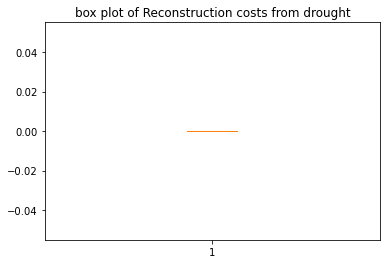

In [45]:
#Reconstruction costs from drought
plt.boxplot(data['Reconstruction costs from drought'])
plt.title("box plot of Reconstruction costs from drought")

Text(0.5, 1.0, 'Insured damages against drought')

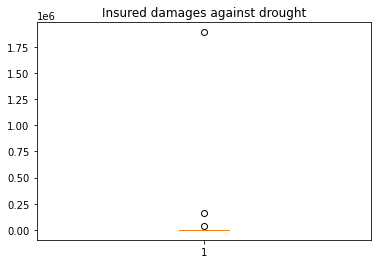

In [46]:
#Insured damages against drought
plt.boxplot(data['Insured damages against drought'])
plt.title("Insured damages against drought")

In [47]:
Q1 =np.percentile(data['Insured damages against drought'], 25, interpolation='midpoint')
Q2 =np.percentile(data['Insured damages against drought'], 50, interpolation='midpoint')
Q3 =np.percentile(data['Insured damages against drought'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1991.8250950570343


In [48]:
IQR=Q3-Q1
IQR

1991.8250950570343

In [49]:
low_lim=Q1-1.5*IQR
hig_lim=Q3+1.5*IQR
print(low_lim)
print(hig_lim)

-2987.7376425855514
4979.5627376425855


any value samller than low and greater than hig is taken by outlier

In [50]:
out_1=data['Insured damages against drought']< low_lim
ind_1=data.loc[out_1].index
print(ind_1)

Int64Index([], dtype='int64')


In [51]:
out_2=data['Insured damages against drought']> hig_lim
ind_2=data.loc[out_2].index
print(ind_2)

Int64Index([289, 618, 1403], dtype='int64')


we can drop the outlier

In [52]:
data.drop([289,618,1403],inplace=True)

In [53]:
data.shape

(1461, 8)

data set now 1461 rows and 8 columns

Text(0.5, 1.0, 'Total economic damages from drought')

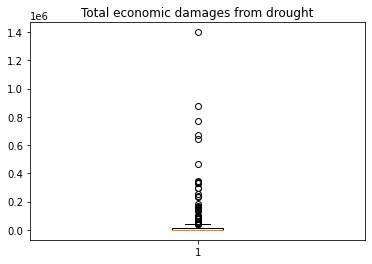

In [54]:
#Total economic damages from drought
plt.boxplot(data['Total economic damages from drought'])
plt.title("Total economic damages from drought")

In [55]:
Q1 =np.percentile(data['Total economic damages from drought'], 25, interpolation='midpoint')
Q2 =np.percentile(data['Total economic damages from drought'], 50, interpolation='midpoint')
Q3 =np.percentile(data['Total economic damages from drought'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
15743.543155893538


In [56]:
low_lim=Q1-1.5*IQR
hig_lim=Q3+1.5*IQR
print(low_lim)
print(hig_lim)

-2987.7376425855514
18731.28079847909


In [57]:
out_1=data['Total economic damages from drought']< low_lim
ind_1=data.loc[out_1].index
print(ind_1)

Int64Index([], dtype='int64')


In [58]:
out_2=data['Total economic damages from drought']> hig_lim
ind_2=data.loc[out_2].index
print(ind_2)

Int64Index([  66,  166,  169,  171,  182,  183,  185,  186,  232,  233,  275,
             286,  287,  288,  336,  367,  435,  455,  485,  508,  598,  599,
             614,  616,  617,  639,  674,  676,  772,  854,  855,  862,  891,
             954, 1013, 1024, 1048, 1083, 1115, 1119, 1175, 1218, 1220, 1246,
            1247, 1318, 1319, 1383, 1401, 1402, 1411, 1413, 1436, 1437, 1438,
            1453, 1463],
           dtype='int64')


In [59]:
data.drop([66,  166,  169,  171,  182,  183,  185,  186,  232,  233,  275,
             286,  287,  288,  336,  367,  435,  455,  485,  508,  598,  599,
             614,  616,  617,  639,  674,  676,  772,  854,  855,  862,  891,
             954, 1013, 1024, 1048, 1083, 1115, 1119, 1175, 1218, 1220, 1246,
            1247, 1318, 1319, 1383, 1401, 1402, 1411, 1413, 1436, 1437, 1438,
            1453, 1463],inplace=True)

In [60]:
data.shape

(1404, 8)

Text(0.5, 1.0, 'Total number of people affected by drought per 100,000')

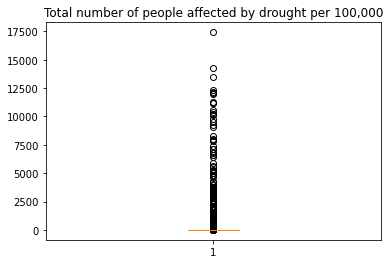

In [61]:
#Total number of people affected by drought per 100,000
plt.boxplot(data['Total number of people affected by drought per 100,000'])
plt.title("Total number of people affected by drought per 100,000")

In [62]:
Q1 =np.percentile(data['Total number of people affected by drought per 100,000'], 25, interpolation='midpoint')
Q2 =np.percentile(data['Total number of people affected by drought per 100,000'], 50, interpolation='midpoint')
Q3 =np.percentile(data['Total number of people affected by drought per 100,000'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
0.0


In [63]:
low_lim=Q1-1.5*IQR
hig_lim=Q3+1.5*IQR
print(low_lim)
print(hig_lim)

-2987.7376425855514
2987.7376425855514


In [64]:
out_1=data['Total number of people affected by drought per 100,000']< low_lim
ind_1=data.loc[out_1].index
print(ind_1)

Int64Index([], dtype='int64')


In [65]:
out_2=data['Total number of people affected by drought per 100,000']> hig_lim
ind_2=data.loc[out_2].index
print(ind_2)

Int64Index([   6,   15,   53,  150,  175,  209,  211,  214,  217,  262,  264,
             371,  373,  422,  423,  427,  428,  429,  432,  434,  442,  478,
             480,  495,  561,  575,  615,  725,  727,  730,  737,  740,  757,
             759,  760,  790,  791,  792,  816,  834,  835,  836,  838,  839,
             896,  897,  916,  919,  972,  974,  975,  984, 1016, 1033, 1120,
            1162, 1174, 1212, 1213, 1219, 1230, 1231, 1253, 1258, 1259, 1306,
            1456, 1461, 1462],
           dtype='int64')


In [66]:
data.drop([6,   15,   53,  150,  175,  209,  211,  214,  217,  262,  264,
             371,  373,  422,  423,  427,  428,  429,  432,  434,  442,  478,
             480,  495,  561,  575,  615,  725,  727,  730,  737,  740,  757,
             759,  760,  790,  791,  792,  816,  834,  835,  836,  838,  839,
             896,  897,  916,  919,  972,  974,  975,  984, 1016, 1033, 1120,
            1162, 1174, 1212, 1213, 1219, 1230, 1231, 1253, 1258, 1259, 1306,
            1456, 1461, 1462],inplace=True)

In [67]:
data.shape

(1335, 8)

In [82]:
data.drop(['affected drought'],axis=1,inplace=True)

In [83]:
data.head()

,Reconstruction costs from drought,Insured damages against drought,Total economic damages from drought,"Total number of people affected by drought per 100,000",death,injured,no home
0,0.0,1991.825095,15743.543156,0.000000,0.0,0.0,0
1,0.0,0.000000,20.000000,44.060951,0.0,0.0,0
2,0.0,0.000000,0.000000,0.000000,0.0,0.0,0
3,0.0,0.000000,0.000000,0.000000,0.0,0.0,0
4,0.0,0.000000,0.000000,0.000000,0.0,0.0,0


Text(0.5, 1.0, 'death')

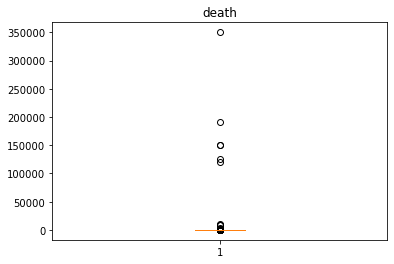

In [70]:
#death

plt.boxplot(data['death'])
plt.title("death")

In [71]:
Q1 =np.percentile(data['death'], 25, interpolation='midpoint')
Q2 =np.percentile(data['death'], 50, interpolation='midpoint')
Q3 =np.percentile(data['death'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
0.0


In [72]:
low_lim=Q1-1.5*IQR
hig_lim=Q3+1.5*IQR
print(low_lim)
print(hig_lim)

-2987.7376425855514
2987.7376425855514


In [73]:
out_2=data['death']> hig_lim
ind_2=data.loc[out_2].index
print(ind_2)

Int64Index([109, 239, 241, 280, 431, 607, 611, 613, 965, 1234], dtype='int64')


In [74]:
data.drop([109, 239, 241, 280, 431, 607, 611, 613, 965, 1234],inplace=True)

In [75]:
data.shape

(1325, 8)

Text(0.5, 1.0, 'injured')

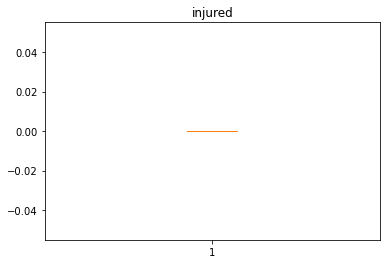

In [76]:
#injured

plt.boxplot(data['injured'])
plt.title("injured")

Text(0.5, 1.0, 'no home')

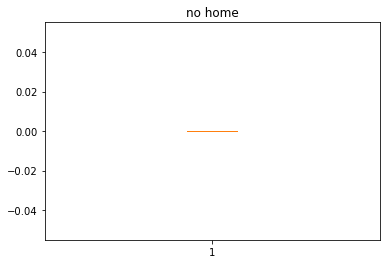

In [77]:
#no home

plt.boxplot(data['no home'])
plt.title("no home")

Linear Regression

In [ ]:
#how many people are affected by drought per 100,000 km

In [84]:
y=data['Total number of people affected by drought per 100,000']
x=data.drop(['Total number of people affected by drought per 100,000'],axis=1)

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [89]:
from sklearn import linear_model

In [90]:
Ir=linear_model.LinearRegression()
ajay=Ir.fit(x_train,y_train)


In [92]:
pred=ajay.predict(x_test)


In [95]:
from sklearn.metrics import r2_score

In [97]:
print('r2:',r2_score(y_test,pred))

r2: 0.0385369297556013


In [98]:
#try to imporove our model in  fature scaling

In [100]:
#min max scaling

In [115]:
x=data.drop(['Total number of people affected by drought per 100,000'],axis=1)

In [116]:
from sklearn import preprocessing

In [117]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))


In [118]:
x=min_max.fit_transform(x)
#then we check x

In [119]:
x=pd.DataFrame(x)

In [120]:
x.describe()

,0,1,2,3,4,5
count,1325.0,1325.000000,1325.000000,1325.000000,1325.0,1325.0
mean,0.0,0.304906,0.278233,0.001968,0.0,0.0
std,0.0,0.460541,0.403005,0.039353,0.0,0.0
min,0.0,0.000000,0.000000,0.000000,0.0,0.0
25%,0.0,0.000000,0.000000,0.000000,0.0,0.0
50%,0.0,0.000000,0.000000,0.000000,0.0,0.0
75%,0.0,1.000000,0.874641,0.000000,0.0,0.0
max,0.0,1.000000,1.000000,1.000000,0.0,0.0


In [107]:
# mimumum is zero and maximum is one the table can be changed by applying model

In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
Ir=linear_model.LinearRegression()
x=Ir.fit(x_train,y_train)
print('r2:',r2_score(y_test,pred))

r2: 0.0385369297556013


In [ ]:
# # min max scale not effect in data set because r square value is same

In [122]:
#standard error

In [124]:
x=data.drop(['Total number of people affected by drought per 100,000'],axis=1)

In [125]:
x.describe()

,Reconstruction costs from drought,Insured damages against drought,Total economic damages from drought,death,injured,no home
count,1325.0,1325.000000,1325.000000,1325.000000,1325.0,1325.0
mean,0.0,607.318746,5008.192102,4.071607,0.0,0.0
std,0.0,917.317684,7254.093480,81.404342,0.0,0.0
min,0.0,0.000000,0.000000,0.000000,0.0,0.0
25%,0.0,0.000000,0.000000,0.000000,0.0,0.0
50%,0.0,0.000000,0.000000,0.000000,0.0,0.0
75%,0.0,1991.825095,15743.543156,0.000000,0.0,0.0
max,0.0,1991.825095,18000.000000,2068.565642,0.0,0.0


In [126]:
#now we go for stanadrd scaling
#we take instant of stadre sacaling into variable

In [127]:
stand=preprocessing.StandardScaler()
#now we will aplly this scaling into x then it is stored in x

In [128]:
x=stand.fit_transform(x)
#then we check x

In [129]:
x=pd.DataFrame(x)

In [130]:
x.describe()

,0,1,2,3,4,5
count,1325.0,1.325000e+03,1.325000e+03,1.325000e+03,1325.0,1325.0
mean,0.0,-6.138486e-16,5.416213e-16,-1.433759e-16,0.0,0.0
std,0.0,1.000378e+00,1.000378e+00,1.000378e+00,0.0,0.0
min,0.0,-6.623093e-01,-6.906560e-01,-5.003596e-02,0.0,0.0
25%,0.0,-6.623093e-01,-6.906560e-01,-5.003596e-02,0.0,0.0
50%,0.0,-6.623093e-01,-6.906560e-01,-5.003596e-02,0.0,0.0
75%,0.0,1.509869e+00,1.480461e+00,-5.003596e-02,0.0,0.0
max,0.0,1.509869e+00,1.791639e+00,2.537056e+01,0.0,0.0


In [131]:
#now we can seen in mimum value and maximum value some changes
# now we can agian create linear regresiion model we changs by model

In [132]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
Ir=linear_model.LinearRegression()
x=Ir.fit(x_train,y_train)
print('r2:',r2_score(y_test,pred))

r2: 0.0385369297556013


In [ ]:
# normalization        

In [139]:
x=data.drop(['Total number of people affected by drought per 100,000'],axis=1)

In [150]:
x.describe()

,Reconstruction costs from drought,Insured damages against drought,Total economic damages from drought,death,injured,no home
count,1325.0,1325.000000,1325.000000,1325.000000,1325.0,1325.0
mean,0.0,607.318746,5008.192102,4.071607,0.0,0.0
std,0.0,917.317684,7254.093480,81.404342,0.0,0.0
min,0.0,0.000000,0.000000,0.000000,0.0,0.0
25%,0.0,0.000000,0.000000,0.000000,0.0,0.0
50%,0.0,0.000000,0.000000,0.000000,0.0,0.0
75%,0.0,1991.825095,15743.543156,0.000000,0.0,0.0
max,0.0,1991.825095,18000.000000,2068.565642,0.0,0.0


In [151]:
x=preprocessing.normalize(x)

In [152]:
x=pd.DataFrame(x)

In [153]:
x.describe()

,0,1,2,3,4,5
count,1325.0,1325.000000,1325.000000,1325.000000,1325.0,1325.0
mean,0.0,0.038270,0.352485,0.017136,0.0,0.0
std,0.0,0.057804,0.475082,0.128288,0.0,0.0
min,0.0,0.000000,0.000000,0.000000,0.0,0.0
25%,0.0,0.000000,0.000000,0.000000,0.0,0.0
50%,0.0,0.000000,0.000000,0.000000,0.0,0.0
75%,0.0,0.125516,0.992092,0.000000,0.0,0.0
max,0.0,0.125516,1.000000,1.000000,0.0,0.0


In [154]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
Ir=linear_model.LinearRegression()
x=Ir.fit(x_train,y_train)
print('r2:',r2_score(y_test,pred))

r2: 0.0385369297556013


In [156]:
# my r2 value is not change so my model is not good
#normalization is good for classification alogorithm